# Lab 5

This lab extends binary logistic regression to [multi-class logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression), which goes by a variety of names, including *softmax regression*, due to the use of the softmax function, which generalizes the logistic function.

In [1]:
# Import the libraries we'll use below.
import numpy as np
import pandas as pd
import seaborn as sns  # for nicer plots
from matplotlib import pyplot as plt

sns.set(style="darkgrid")  # default style

import tensorflow as tf
from keras import metrics
from tensorflow import keras

tf.get_logger().setLevel("INFO")

We again load the Fashion MNIST dataset, though this time around, we'll use all 10 output classes.

In [2]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

label_names = [
    "t-shirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "sneaker",
    "bag",
    "ankle boot",
]

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train = X_train[shuffled_indices]
Y_train = Y_train[shuffled_indices]

### Cross-Entropy Loss

Recall the log loss function (also called binary cross-entropy):

\begin{equation}
-y log(\hat{y}) + (1−y)log(1−\hat{y})
\end{equation}

In the above formulation, it is assumed that $y$ is either 0 or 1, so either the left term or the right term is active for each example.

The general form for cross-entropy is used when $y$ is assumed to be a label vector with a 1 in the index of the true label and a 0 everywhere else: $y=[0,0,0,0,0,0,0,1,0,0]$ implies a label of "sneaker" in this dataset (the 7th label). Accordingly, $\hat{y}$ is a vector of predicted probabilities. Then the cross-entropy loss is simply:

\begin{equation}
-\sum_{j} y_j log(\hat{y}_j)
\end{equation}

As in the binary case, this summation will have exactly 1 non-zero term where the true label $y_j=1$.

Note that this formulation is using a *dense* representation of the label. The corresponding *sparse* representation would use the non-zero index directly ($y=7$).

## Build a model

Let's construct a model much like we did in the binary classification case, but now with a multi-class output.

---
### Exercise 1 (8 points)

Fill in the NotImplemented parts of the build_model function below. You will need to make the following changes to generalize the binary case to the multi-class case:
* The output will include 10 probabilities instead of 1.
* Use a softmax function instead of a sigmoid.
* Use a [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) loss instead of binary_crossentropy. Note that "sparse" refers to the use of a sparse index (e.g. 7) to indicate the label rather than a dense vector (e.g. [0,0,0,0,0,0,0,1,0,0]).

Check that training works below.

In [3]:
def build_model(n_classes, learning_rate=0.01):
    """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of classes in the dataset
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    model.add(
        keras.layers.Dense(
            # YOUR CODE HERE
            units=n_classes,
            activation="softmax",
        )
    )

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # YOUR CODE HERE
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    return model

---

Make sure your model trains. If you configured it properly, the training loss should get to ~0.55 after 5 epochs.

In [4]:
model = build_model(len(label_names), 0.01)

history = model.fit(
    x=X_train, y=Y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1
)

history = pd.DataFrame(history.history)
display(history)

Metal device set to: Apple M1 Pro
Epoch 1/5


2022-05-30 13:26:53.129925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-30 13:26:53.130549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-30 13:26:53.300714: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 24/844 [..............................] - ETA: 3s - loss: 2.1488 - accuracy: 0.2077

2022-05-30 13:26:53.388135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - ETA: 0s - loss: 1.0016 - accuracy: 0.6869

2022-05-30 13:26:57.062157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - 4s 5ms/step - loss: 1.0016 - accuracy: 0.6869 - val_loss: 0.7637 - val_accuracy: 0.7492
Epoch 2/5
844/844 [==============================] - 4s 4ms/step - loss: 0.6846 - accuracy: 0.7809 - val_loss: 0.6648 - val_accuracy: 0.7772
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.6152 - accuracy: 0.8017 - val_loss: 0.6199 - val_accuracy: 0.7898
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.5778 - accuracy: 0.8132 - val_loss: 0.5960 - val_accuracy: 0.7992
Epoch 5/5
844/844 [==============================] - 4s 5ms/step - loss: 0.5537 - accuracy: 0.8200 - val_loss: 0.5735 - val_accuracy: 0.8092


,loss,accuracy,val_loss,val_accuracy
0,1.001597,0.686944,0.763669,0.749167
1,0.684576,0.780889,0.664765,0.777167
2,0.615184,0.801685,0.619861,0.789833
3,0.577846,0.813222,0.595960,0.799167
4,0.553693,0.819981,0.573506,0.809167


### Evaluation Metrics

Classification metrics like accuracy, precision, and recall can all be derived from a confusion matrix which displays the counts for all pairs of true label and predicted label. Correct predictions are on the diagonal and incorrect predictions (confusions) are off the diagonal.

First, we need the predicted labels from the model.

In [5]:
# Recall that model.predict gives a vector of probabilities for each x.
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(X_test), axis=-1)
print(test_predictions)

2022-05-30 13:27:35.766249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[9 2 1 ... 8 1 5]


Next, we create a confusion matrix and produce an easy-to-read visualization.

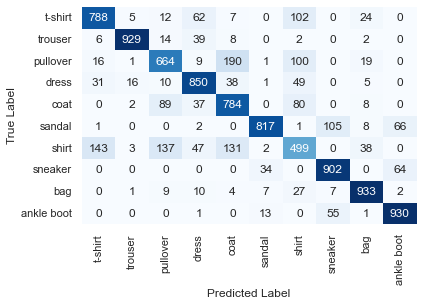

In [6]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(Y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt=".3g",
    cmap="Blues",
    xticklabels=label_names,
    yticklabels=label_names,
    cbar=False,
)

# Add axis labels.
ax.set(xlabel="Predicted Label", ylabel="True Label")
plt.show()

---
### Exercise 2 (8 points)

Answer the following questions by studying the confusion matrix (above).

1. Which class has the lowest precision? What is that precision? Which class has the highest precision? What is that precision?

2. For the class 'sneaker', what class is the largest source of false negatives? What about the largest source of false positives?

In [71]:
for i in range(confusion_matrix.shape[0]):
    print(
        f"{label_names[i]: <10} True Positive: {confusion_matrix[i,i]} \
False Positive: {tf.reduce_sum(confusion_matrix[:,i]) - confusion_matrix[i,i]:3} \
Total Positive: {tf.reduce_sum(confusion_matrix[:,i]):4} \
Precision: {confusion_matrix[i,i]/ tf.reduce_sum(confusion_matrix[:,i]):.2f}"
    )

t-shirt    True Positive: 788 False Positive: 197 Total Positive:  985 Precision: 0.80
trouser    True Positive: 929 False Positive:  28 Total Positive:  957 Precision: 0.97
pullover   True Positive: 664 False Positive: 271 Total Positive:  935 Precision: 0.71
dress      True Positive: 850 False Positive: 207 Total Positive: 1057 Precision: 0.80
coat       True Positive: 784 False Positive: 378 Total Positive: 1162 Precision: 0.67
sandal     True Positive: 817 False Positive:  58 Total Positive:  875 Precision: 0.93
shirt      True Positive: 499 False Positive: 361 Total Positive:  860 Precision: 0.58
sneaker    True Positive: 902 False Positive: 167 Total Positive: 1069 Precision: 0.84
bag        True Positive: 933 False Positive: 105 Total Positive: 1038 Precision: 0.90
ankle boot True Positive: 930 False Positive: 132 Total Positive: 1062 Precision: 0.88


*Written answer:*

1. The class with the lowest precision is **shirt**, the precision for that class is **0.58**.  
The class with the highest precision is **trouser**, the precision for that class is **0.97**.
2.  The largest source of false negatives for the **sneaker** class is the **ankle boot** class.  
The largest source of false positives for the **sneaker** class is the **sandal** class.

---

## Analyze Errors

A crucial part of the development cycle in Machine Learning is analyzing errors to help understand the shortcomings of the model. While typically we'd want to use the development data for this purpose to preserve the purity of the test set, we'll just use our test split for simplicity.

Since the "shirt" class seems to be the source for a lot of errors, let's look at some of the confusions.

---
### Exercise 3 (8 points)

1. Display 5 images with true label "shirt", but predicted label "coat" (false negatives for the "shirt" class).
2. Display 5 images with predicted label "shirt", but true label "coat" (false positives for the "shirt" class).

Five shirts predicted to be coats (shirt class false negatives):


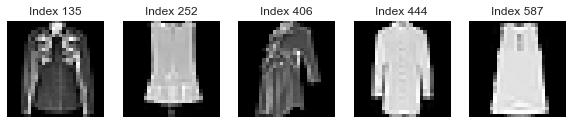

Five coats predicted to be shirts (shirt class false positives):


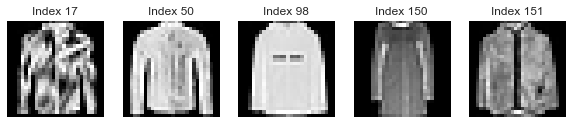

In [138]:
# Look up the class indexes for the shirt and coat classes.
shirt_class_index = label_names.index("shirt")
coat_class_index = label_names.index("coat")

# Gather the indexes from the test data for shirts and coats.
shirt_indexes = np.where(Y_test == shirt_class_index)
coat_indexes = np.where(Y_test == coat_class_index)

# Gather the indexes for predicted shirts and coats.
predicted_shirt_indexes = np.where(test_predictions == shirt_class_index)
predicted_coat_indexes = np.where(test_predictions == coat_class_index)

# Identify the indexes for shirts predicted as coats and coats predicted as shirts
shirts_predicted_as_coats = np.intersect1d(shirt_indexes, predicted_coat_indexes)
coats_predicted_as_shirts = np.intersect1d(coat_indexes, predicted_shirt_indexes)

print("Five shirts predicted to be coats (shirt class false negatives):")
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for i in range(5):
    image = X_test[shirts_predicted_as_coats[i]]
    axs[i].set_title(f"Index {shirts_predicted_as_coats[i]}")
    axs[i].imshow(image, cmap="gray")
    axs[i].axis("off")
plt.show()

print("Five coats predicted to be shirts (shirt class false positives):")
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for i in range(5):
    image = X_test[coats_predicted_as_shirts[i]]
    axs[i].set_title(f"Index {coats_predicted_as_shirts[i]}")
    axs[i].imshow(image, cmap="gray")
    axs[i].axis("off")
plt.show()

## Visualize Parameters
Finally, here's some code that helps visualize the learned parameters for each class.

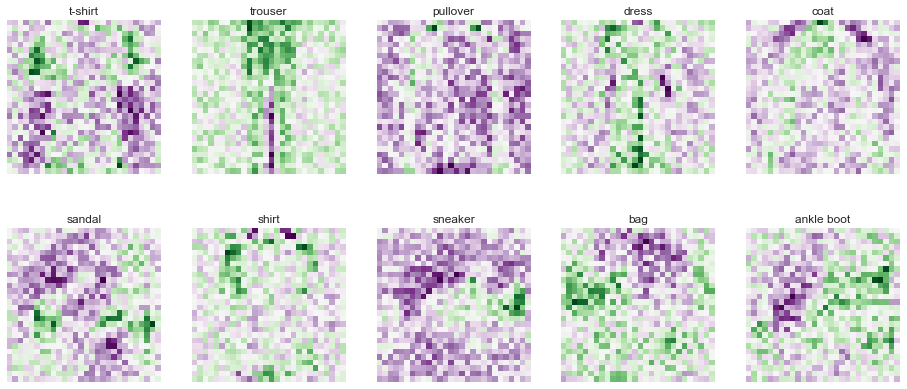

In [136]:
weights, biases = model.layers[1].get_weights()
fig, axs = plt.subplots(2, 5, figsize=(16, 7))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(weights[:, i].reshape(28, 28), cmap="PRGn")
    ax.axis("off")
    ax.set_title(label_names[i])
plt.show()